In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [78]:
np.set_printoptions(suppress=True)

In [79]:
# TEMP = 20.2
TEMP = 293.35
U_Reversed = np.arange(-0.2, -0.01 + 0.01, 0.01)
U_Direct   = np.arange(0, 0.15 + 0.01, 0.01)
I_Reversed = np.array([-0.031 for _ in range(11)] + [-0.030, -0.030, -0.029, -0.028, -0.027, -0.025, -0.022, -0.017, -0.01])
I_Direct   = np.array([0.0, 0.016, 0.037, 0.068, 0.109, 0.162, 0.238, 0.339, 0.483, 0.658, 0.862, 1.155, 1.548])

U = np.concatenate((U_Reversed, U_Direct))
I = np.concatenate((I_Reversed, I_Direct))

# print(I)
# print(U)

minLen = min(len(U), len(I))

U = U[:minLen]
I = I[:minLen]

print(I)
print(U)

[-0.031 -0.031 -0.031 -0.031 -0.031 -0.031 -0.031 -0.031 -0.031 -0.031
 -0.031 -0.03  -0.03  -0.029 -0.028 -0.027 -0.025 -0.022 -0.017 -0.01
  0.     0.016  0.037  0.068  0.109  0.162  0.238  0.339  0.483  0.658
  0.862  1.155  1.548]
[-0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09
 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03
  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12]


In [80]:
temps = np.array([22, 27, 33, 36, 39, 42, 45, 48, 51, 54])
Is    = np.array([-0.020, -0.028, -0.049, -0.057, -0.068, -0.083, -0.099, -0.119, -0.142, -0.168])

print(temps)
print(Is)

[22 27 33 36 39 42 45 48 51 54]
[-0.02  -0.028 -0.049 -0.057 -0.068 -0.083 -0.099 -0.119 -0.142 -0.168]


In [81]:
def buildPolynomialPlot(x, y, xname, yname, degree):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    coefficients = np.polyfit(x, y, degree)
    quadratic = np.poly1d(coefficients)

    # Generate y-values based on the fitted line
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = quadratic(x_fit)

    # Plot the fitted line
    plt.plot(x_fit, y_fit, color='red')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)

    plt.title(f'Аппроксимация полиномом {degree}-й степени')

    plt.legend()

    # Show the plot
    plt.show()

def buildSplinePlot(x, y, xname, yname, s):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    # Generate x values for plotting the curve
    x_fit = np.linspace(min(x), max(x), 100)

    spline = UnivariateSpline(x, y, s=s)  # s=0 means no smoothing
    y_fit_spline = spline(x_fit)

    # Plot the fitted spline curve
    plt.plot(x_fit, y_fit_spline, color='red')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)
    
    if s == 1:
        plt.title('Аппроксимация сплайном со сглаживанием')
    elif s == 0:
        plt.title('Аппроксимация сплайном без сглаживания')

    plt.legend()

    # Show the plot
    plt.show()

def buildPlot(x, y, xname, yname):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    # Plot the fitted spline curve
    plt.plot(x, y, color='red')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)

    plt.legend()

    # Show the plot
    plt.show()

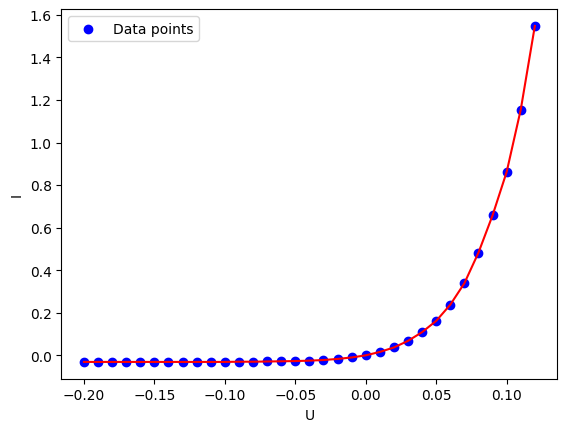

In [82]:
# buildPolynomialPlot(I, U, 'I', 'U', 1)
# buildSplinePlot(I, U, 'I', 'U', 1)
buildPlot(U, I, 'U', 'I')

In [83]:
tol = 1e-9

beg = np.where(np.isclose(U, -0.2,  atol=tol))[0][0]
end = np.where(np.isclose(U, -0.15, atol=tol))[0][0]

I_s_vals = I[beg:end]

I_s = sum(I_s_vals)/len(I_s_vals)
I_s = abs(I_s)

print(I_s)

0.031


[-3.434  -3.434  -2.7408 -2.3354 -2.0477 -1.6422 -1.2368 -0.7949 -0.3895
  0.      0.4162  0.7855  1.1611  1.5077  1.8287  2.1607  2.4795  2.8082
  3.1013  3.3606  3.6444  3.9306]
[-0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03
  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12]
[-3.4339872  -2.74084002 -2.33537492 -2.04769284 -1.64222774 -1.23676263
 -0.79492987 -0.38946477  0.          0.4161604   0.7855205   1.16113265
  1.50765522  1.82870298  2.16072418  2.4795158   2.80823606  3.10125407
  3.36059938  3.64435438  3.93055981]


C:\Users\HYPERPC\AppData\Local\Temp\ipykernel_9288\2362452964.py:1: RuntimeWarning: divide by zero encountered in log
  ln_vals = np.array([np.log(1 + I/I_s) for I in I])


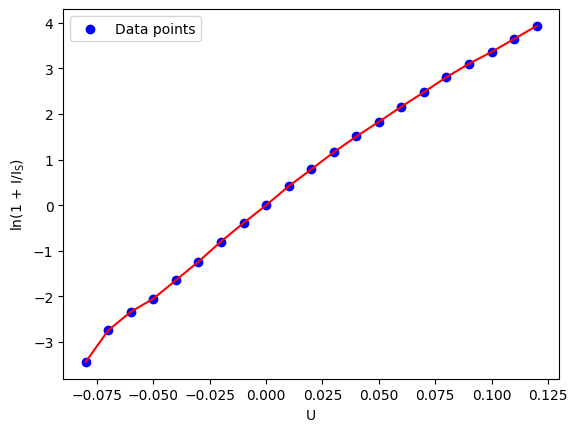

In [84]:
ln_vals = np.array([np.log(1 + I/I_s) for I in I])

ln_vals = ln_vals[ln_vals != -np.inf]

print(np.round(np.array(ln_vals), 4))

minLen = min(len(ln_vals), len(U))

U_for_ln = U[len(U)-minLen+1:]
ln_vals  = ln_vals[1:minLen]

print(U_for_ln)
print(ln_vals)

buildPlot(U_for_ln, ln_vals, 'U', f'$\\text{{ln}}(\\text{{1 + I/}}\\text{{I}}_\\text{{S}})$')

In [85]:
tol = 1e-9

beg = np.where(np.isclose(U_for_ln, -0.08,  atol=tol))[0][0]
end = np.where(np.isclose(U_for_ln, 0.06, atol=tol))[0][0]

U_for_ln = U_for_ln[beg:end]
ln_vals  = ln_vals[beg:end]

print(U_for_ln)
print(ln_vals)

[-0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03
  0.04  0.05]
[-3.4339872  -2.74084002 -2.33537492 -2.04769284 -1.64222774 -1.23676263
 -0.79492987 -0.38946477  0.          0.4161604   0.7855205   1.16113265
  1.50765522  1.82870298]


In [86]:
def buildLinearPlot(x, y, xname, yname):
    # Example data: two arrays with equal elements
    x = np.array(x)
    y = np.array(y)

    # Scatter plot of the points
    plt.scatter(x, y, color='blue', label='Data points')

    # Fit a straight line through the points (1st degree polynomial)
    coefficients = np.polyfit(x, y, 1)
    slope, intercept = coefficients

    # Generate y-values based on the fitted line
    y_fit = slope * x + intercept

    # Plot the fitted line
    plt.plot(x, y_fit, color='red')

    # Add labels and title
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()

    # Show the plot
    plt.show()

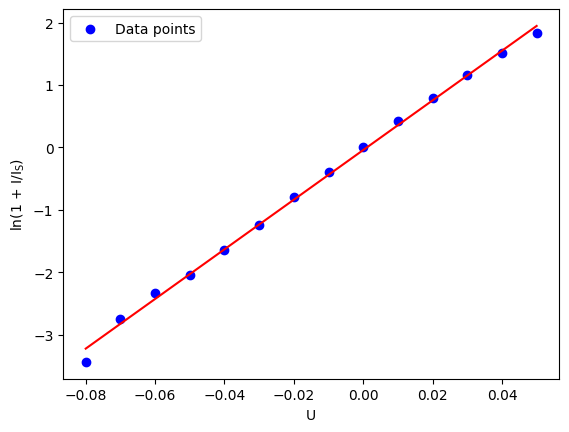

In [87]:
buildLinearPlot(U_for_ln, ln_vals, 'U', f'$\\text{{ln}}(\\text{{1 + I/}}\\text{{I}}_\\text{{S}})$')

In [88]:
q_kT = 7.63/0.2
print(q_kT)
q_k = q_kT * TEMP
print(q_k)

38.15
11191.3025


In [89]:
C_to_K = lambda val : val + 273.15

Is = Is

Is0 = Is[0]

numero = np.arange(1, 14 + 1, 1)

temps_K = np.array([C_to_K(val) for val in temps])
one_temps_K = 1 / temps_K
ln_vals2  = np.log(Is/Is0)

print(numero)
print(temps)
print(temps_K)
print(one_temps_K)
print(Is)
print(ln_vals2)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[22 27 33 36 39 42 45 48 51 54]
[295.15 300.15 306.15 309.15 312.15 315.15 318.15 321.15 324.15 327.15]
[0.00338811 0.00333167 0.00326637 0.00323468 0.00320359 0.00317309
 0.00314317 0.00311381 0.00308499 0.0030567 ]
[-0.02  -0.028 -0.049 -0.057 -0.068 -0.083 -0.099 -0.119 -0.142 -0.168]
[0.         0.33647224 0.89608802 1.04731899 1.22377543 1.42310833
 1.59938758 1.78339122 1.96009478 2.12823171]


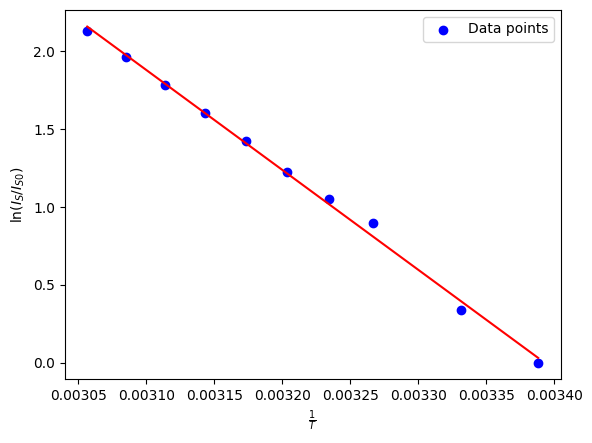

In [90]:
buildLinearPlot(one_temps_K, ln_vals2, r'$\frac{1}{T}$', r'$\text{ln}(I_S/I_{S0})$')